#Fake Person Detector

**Summary**

In this model it's aimed to create a network that can analyse and determine wheter given input is a real human picture or a computer generated fake human picture.

To achieve that a CNN model with various layers is being used.




Author:

Ömer Cem Turan

omercemturan@gmail.com

160503133


#Importing libraries

Keras and Tensorflow is being used in this project.

And also GPU acceleration of Google Colab will help to model to process the given data faster.

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Dense,Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras import optimizers
import tensorflow as tf
from keras import backend as K
from tensorflow.python.client import device_lib
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

from keras.models import Model
from keras.applications import ResNet50
from keras.applications import VGG16



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


Using TensorFlow backend.


In [ ]:
import os


In [ ]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12017128064388428693, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3900581593646254838
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14995349616725878366
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8815337293060885346
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

#Importing Data

Check wheter google drive is connected or not. If 'training_set' and 
'test_set' are shown, data is ready to be processed

In [ ]:
import zipfile
from google.colab import drive


zip_ref = zipfile.ZipFile("/content/drive/My Drive/DeepLearning/data/project_data.zip", 'r')
zip_ref.extractall("/content/tmp/")
zip_ref.close()

In [ ]:
print(os.listdir("/content/tmp/project_data"))


['.DS_Store', 'test_set', 'training_set']


#Preparing Input Data

Input data consist of PNG pictures with the resolution of 128x128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)


#Setting Input Path and Data Properties

Resolution is 128x128 for each image

Setting batch size to 64

This network is going to give output data in binary

In [ ]:
training_set = train_datagen.flow_from_directory('/content/tmp/project_data/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')


validation_set = train_datagen.flow_from_directory('/content/tmp/project_data/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='validation')



test_set = test_datagen.flow_from_directory('/content/tmp/project_data/test_set',
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 17100 images belonging to 2 classes.
Found 1899 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Initializing Layers with Custom Network

This model consist of 4 CNN Filters with Relu activaiton function.

Than two fully connected layers with 64 and 16 nodes and their activation function is Relu.

Output layer is a single fully connected layer with one node and a sigmoid activaiton function.

The optimizer algorithm in this model is Adam optimizer.

In [ ]:
def defaultNet():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', input_shape = (128, 128, 3), activation = 'relu'))

  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Flatten())

  model.add(Dense(units = 64, activation = 'relu'))
  model.add(Dense(units = 16, activation = 'relu'))
  model.add(Dense(units = 1, activation = 'sigmoid'))

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

# AlexNet

Implemention of AlexNet in Keras

In [ ]:
def alexNet():
  #Instantiate an empty model
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(4096, input_shape=(224*224*3,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

  # 2nd Fully Connected Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))

  # 3rd Fully Connected Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))

  # Output Layer
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  #model.summary()

  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# ResNet
Implemention of ResNet in Keras


In [ ]:
def resNet():
  resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(128, 128, 3))

  model = Sequential()
  model.add(resnet)
  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization(axis=3))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model


# VGG16
Implemention of VGG16 in Keras

In [ ]:
def vgg16():
  conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(128, 128, 3))

  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  conv_base.trainable = False

  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['accuracy'])
  return model

# Model Selection and Summary
Summary of seleted model architecture and number of parameters are shown bellow. Options are:


*   Custom network above 
*   AlexNet
*   ResNet
*   VGG16



In [ ]:
classifier = resNet()
# Alternatives are
#
# classifier = alexNet()
# classifier = vgg16()
# classifier = defaultNet() 

classifier.summary()

NameError: ignored

#Execuring the Training and Testing Phase

Weights will be saved in Google Drive.

Model checkpoint is being set.



In [ ]:
filepath = "/content/drive/My Drive/DeepLearning/best_model_alexNet.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         epochs = 15 ,
                         validation_data = validation_set,
                         callbacks = [checkpoint])
print(history.history.keys())

Epoch 1/15
268/268 [==============================] - 200s 746ms/step - loss: 0.1803 - accuracy: 0.9289 - val_loss: 0.8053 - val_accuracy: 0.4997

Epoch 00001: val_accuracy improved from -inf to 0.49974, saving model to /content/drive/My Drive/DeepLearning/best_model_alexNet.hdf5
Epoch 2/15
268/268 [==============================] - 182s 680ms/step - loss: 0.0610 - accuracy: 0.9768 - val_loss: 0.7296 - val_accuracy: 0.4997

Epoch 00002: val_accuracy did not improve from 0.49974
Epoch 3/15
268/268 [==============================] - 182s 681ms/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 1.1386 - val_accuracy: 0.6435

Epoch 00003: val_accuracy improved from 0.49974 to 0.64350, saving model to /content/drive/My Drive/DeepLearning/best_model_alexNet.hdf5
Epoch 4/15
268/268 [==============================] - 182s 680ms/step - loss: 0.0284 - accuracy: 0.9901 - val_loss: 1.3050 - val_accuracy: 0.6087

Epoch 00004: val_accuracy did not improve from 0.64350
Epoch 5/15
268/268 [===========

#Analyzing the Learning

The learning process is plotted below.

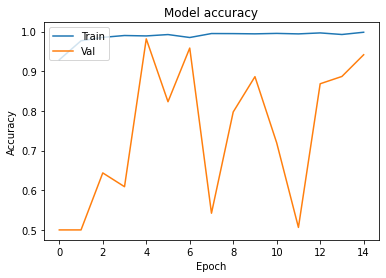

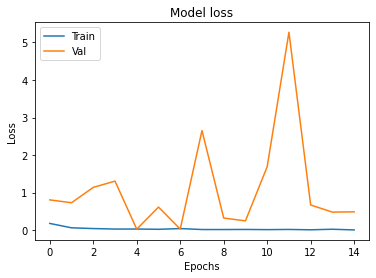

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#Evaluating the Model
Evaluating the model with test data.
 
Weights are loaded from given path.

In [1]:
classifier.load_weights("/content/drive/My Drive/DeepLearning/best_model_resNet.hdf5")
evaluation = classifier.evaluate_generator(test_set)
print('test loss, test accuracy: ', evaluation)

NameError: ignored

#Testing

Manually testing with normal pictures.

In [ ]:
classifier.load_weights("/content/drive/My Drive/DeepLearning/best_model_default.hdf5")


ValueError: ignored

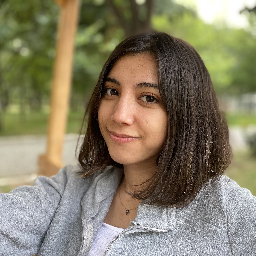

{'fake': 0, 'real': 1}
[[1.]]
real


In [ ]:
from keras.preprocessing import image

path = '/content/sample_data/image0.jpg'
test_image = image.load_img( path, target_size = (128, 128))
preview = image.load_img(path, target_size = (256, 256))

display(preview)
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)
if result[0][0] > 0.5:
    prediction = 'real'
else:
    prediction = 'fake'
print(prediction)